In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#from pandas_profiling import ProfileReport
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

# Carregando os dados

In [3]:
training = pd.read_csv('../input/renner_desafio_pucrs_treino.csv')

# Explorando os dados

In [4]:
df_train = training.copy()

In [ ]:
#Gerando o Profile Report
#profile = ProfileReport(df_train)
#profile.to_file('profile_output.html')

In [9]:
df_train.head()

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
0,100342,58,202130,2021-07-25,51,fisica,br,G,RIO
1,100342,63,202221,2022-05-22,86,fisica,br,G,RIO
2,100342,84,202131,2021-08-01,62,fisica,br,G,RIO
3,100342,2,202222,2022-05-29,171,fisica,br,G,SUL
4,100342,407,202223,2022-06-05,188,web,br,GG,W


In [5]:
print(df_train.shape)

(92877, 9)


In [7]:
print("{} Colunas numéricas, {} Colunas categóricas".format(
    list(df_train.select_dtypes(include=[np.number]).shape)[1],
    list(df_train.select_dtypes(include = ['object']).shape)[1]))

4 Colunas numéricas, 5 Colunas categóricas


In [8]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{int64: ['item', 'cod_loja', 'semana_comercial', 'venda'], object: ['data_semana_comercial', 'categoria_loja', 'localidade', 'loja_tamanho', 'clima']}

In [15]:
#Colunas com valores faltantes
print('{} Colunas com valores faltantes: '.format(
    len(df_train.columns[df_train.isna().any()].tolist())))
df_train.columns[df_train.isna().any()].tolist()

0 Colunas com valores faltantes: 


[]

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92877 entries, 0 to 92876
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   item                   92877 non-null  int64 
 1   cod_loja               92877 non-null  int64 
 2   semana_comercial       92877 non-null  int64 
 3   data_semana_comercial  92877 non-null  object
 4   venda                  92877 non-null  int64 
 5   categoria_loja         92877 non-null  object
 6   localidade             92877 non-null  object
 7   loja_tamanho           92877 non-null  object
 8   clima                  92877 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.4+ MB


In [17]:
df_train.describe()

,item,cod_loja,semana_comercial,venda
count,92877.0,92877.000000,92877.000000,92877.000000
mean,100342.0,176.024742,201975.466036,26.485158
std,0.0,107.675970,163.395399,71.062728
min,100342.0,1.000000,201701.000000,-4.000000
25%,100342.0,84.000000,201831.000000,5.000000
50%,100342.0,170.000000,201951.000000,14.000000
75%,100342.0,260.000000,202123.000000,30.000000
max,100342.0,420.000000,202234.000000,5476.000000


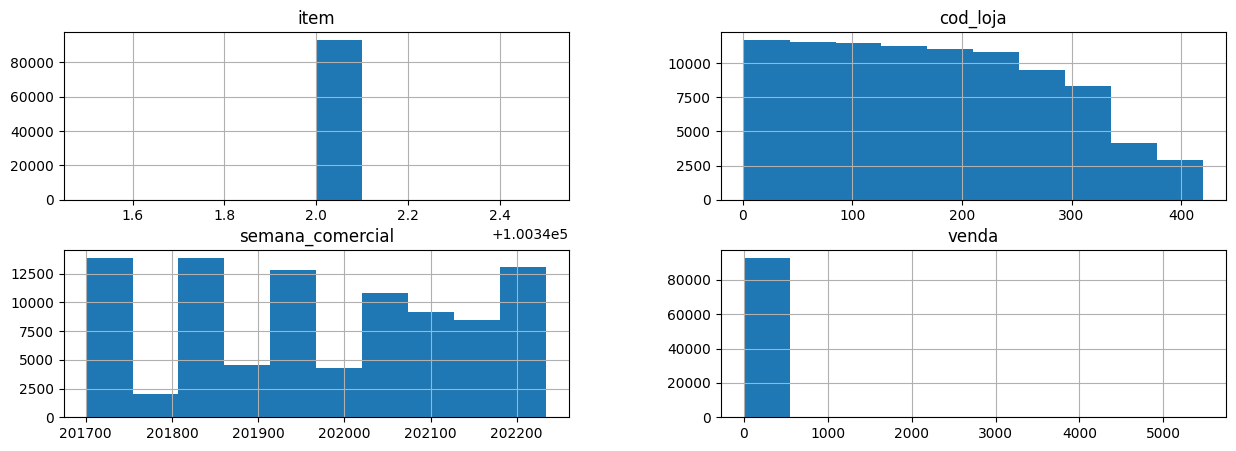

In [25]:
df_train.hist(figsize=(15,5))
plt.show()

<AxesSubplot: >

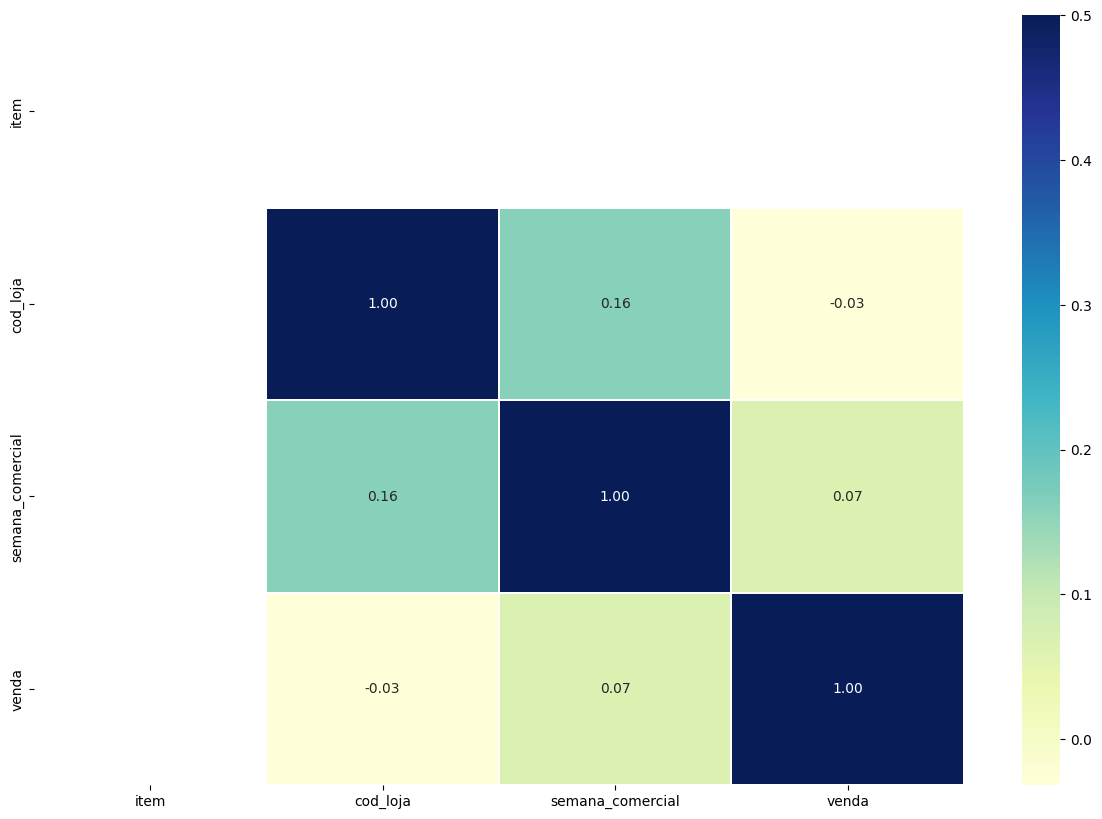

In [27]:
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,10))
sns.heatmap(corr,
            vmax=.5,
            annot=True,
            fmt='.2f',
            linewidths=.2, cmap='YlGnBu')

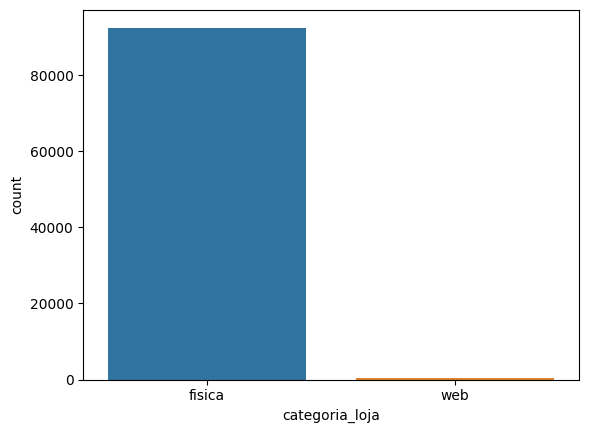

In [28]:
#Quantidade de lojas fisicas e lojas web
sns.countplot(x='categoria_loja', data=df_train)
plt.show()

<AxesSubplot: xlabel='categoria_loja', ylabel='venda'>

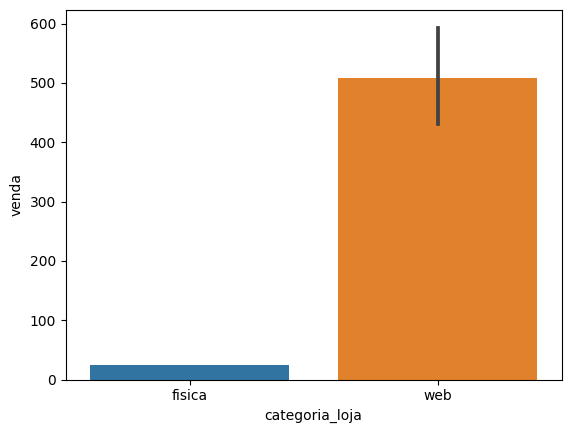

In [29]:
#Quantidade de venda por cat. de loja
sns.barplot(x='categoria_loja', y='venda', data=df_train)

In [33]:
# Estatisticas da variavel alvo
print("Estatísticas de venda do dataset de treino:\n")
print("Menor # de vedas: {:,.2f}".format(np.min(df_train['venda'])))
print("Maior # de vendas: {:,.2f}".format(np.max(df_train['venda'])))
print("# médio de vendas: {:,.2f}".format(np.mean(df_train['venda'])))
print("Mediana do # de vendas {:,.2f}".format(np.median(df_train['venda'])))
print("Desvio padrão dos # de vendas: {:,.2f}".format(np.std(df_train['venda'])))

Estatísticas de venda do dataset de treino:

Menor # de vedas: -4.00
Maior # de vendas: 5,476.00
# médio de vendas: 26.49
Mediana do # de vendas 14.00
Desvio padrão dos # de vendas: 71.06


<AxesSubplot: ylabel='venda'>

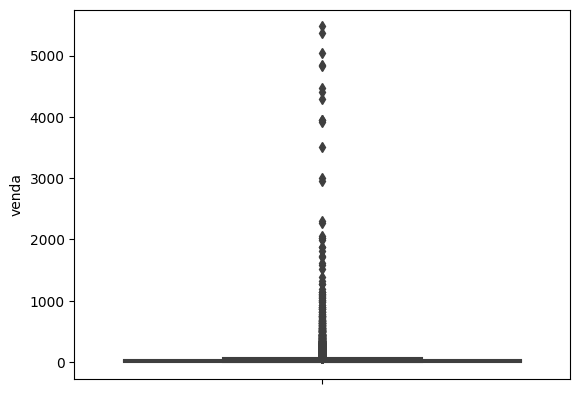

In [35]:
#Visualizando outliers
sns.boxplot(y=df_train['venda'])

In [5]:
df_train[df_train['venda'] < 0]

,item,cod_loja,semana_comercial,data_semana_comercial,venda,categoria_loja,localidade,loja_tamanho,clima
900,100342,12,201743,2017-10-22,-1,fisica,br,G,SUL
1596,100342,321,201943,2019-10-27,-2,fisica,br,P,SPO
1791,100342,270,202007,2020-02-16,-1,fisica,br,M,SUL
1837,100342,273,202138,2021-09-19,-2,fisica,br,P,RIO
1983,100342,111,202203,2022-01-16,-1,fisica,br,M,RIO
...,...,...,...,...,...,...,...,...,...
92827,100342,58,202001,2020-01-05,-1,fisica,br,G,RIO
92846,100342,323,202145,2021-11-07,-1,fisica,br,P,NOR
92850,100342,171,201826,2018-07-01,-1,fisica,br,P,SPO
92858,100342,312,201745,2017-11-05,-1,fisica,br,M,SUL


## Insights/anotações iniciais


*   Sem dados nulos, faltantes ou duplicados;
*   Colunas desnecessárias para o treinamento (dropar): Item, semana_comercial (recomendação do Hollisson);
*   Garantir que exista 1 linha por item, loja e data_semana_comercial (recomendação do Hollisson);
*   Possuimos somente duas lojas web, mas mesmo assim a quantidade de venda é muito maior do que a venda nas lojas físicas. Talvez, seja interessante separar modelos diferentes para cada tipo de loja;
*   Lojas web: cod 406 e 407 - todas tem: localidade = br, tamanho = gg, clima = w
*   Temos linhas com a quantidade de venda negativa (520 de 92877), fazer o tratamento;
